In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_b(x,y):
    numerator=np.sum((x*y)-(y.mean()*x))
    denomerator=np.sum((x**2)-(x.mean()*x))
    return numerator/denomerator

In [3]:
# Calculate coef a
def R2_error(x,y,a,b):
    numerator=y-(b*x+a)
    denumreator=y-y.mean()
    return 1-np.sum(numerator**2)/np.sum(denumreator**2)

In [4]:
# Plot
def plot_line(slope, intercept, x_low, x_high):
    axes=plt.gca()
    x_vals=np.arange(x_low, x_high)
    y_vals=intercept+slope*x_vals
    plt.plot(x_vals, y_vals, '-', color='red')

In [5]:
# Generate Data
x=np.array(list(range(0,30)))
y=np.array([1.8*F+32 for F in x])

Text(0.5, 1.0, 'Scatter Plot of The Data')

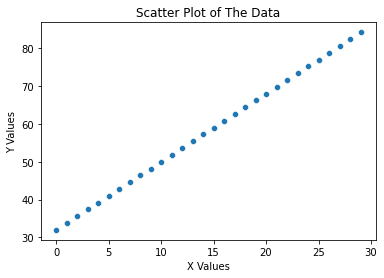

In [6]:
fig=sns.scatterplot(x,y)
fig.set_xlabel('X Values')
fig.set_ylabel('Y Values')
fig.set_title('Scatter Plot of The Data')

In [7]:
def get_a(x,y):
    return np.mean(y)-get_b(x,y)*np.mean(x)

In [8]:
b = get_b(x,y)
a = get_a(x,y)
print(a,b)

31.999999999999996 1.8000000000000003


32.0 1.8


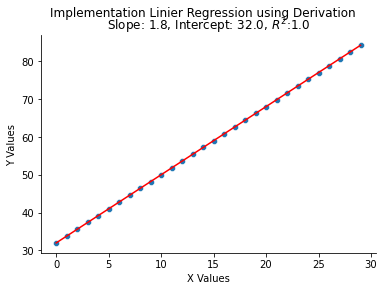

In [9]:
plot_line(b,a,0,len(x))

R2=round(R2_error(x,y,a,b),3)
a,b = round(a,5),round(b,5)

fig = sns.scatterplot(x,y)
fig.set_xlabel('X Values')
fig.set_ylabel('Y Values')
fig.set_title(f'Slope: {b}, Intercept: {a}, $R^{2}$:{R2}',y=1)

plt.suptitle('Implementation Linier Regression using Derivation')
sns.despine()
plt.savefig('numpy_manual_reg.png')
print(a,b)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
model=LinearRegression()
model.fit(x.reshape(-1,1),y)

LinearRegression()

In [12]:
b_2 = model.coef_
a_2 = model.intercept_

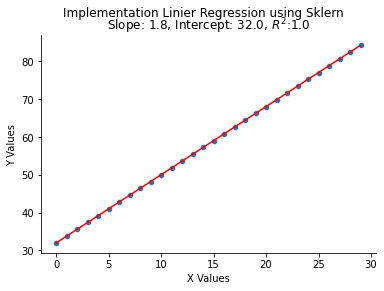

In [13]:
plot_line(b_2,a_2,0,len(x))

y_pred=a_2+b_2*x

r2=round(r2_score(y,y_pred),3)
a_2,b_2 = round(a_2,5),round(b_2[0],5)
fig = sns.scatterplot(x,y)
fig.set_xlabel('X Values')
fig.set_ylabel('Y Values')
fig.set_title(f'Slope: {b_2}, Intercept: {a_2}, $R^{2}$:{R2}',y=1)

plt.suptitle('Implementation Linier Regression using Sklern')
sns.despine()